In [1]:
import numpy as np

In [1]:
import torch

print(torch.cuda.is_available())


print(torch.cuda.device_count())


print(torch.cuda.current_device())


print(torch.cuda.device(0))


print(torch.cuda.get_device_name(0))


True
1
0
NVIDIA RTX A3000 12GB Laptop GPU


In [2]:
state_constraints = np.array([[-1., 1.], ])
state_constraints

array([[-1.,  1.]])

In [3]:
state_dim = 4

In [4]:
grid_limits = np.array([[-1., 1.], ] * state_dim)
grid_limits

array([[-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.]])

In [5]:
a = np.array([-1., -2.])
a.T.shape

(2,)

In [6]:
b = np.array([1., 2.])
b.shape

(2,)

In [7]:
np.vstack((a, b))

array([[-1., -2.],
       [ 1.,  2.]])

In [8]:
def myfunction(first, second, third = None):
    if third is None:
        print('the third arg is None')#just use first and second
    else:
        print('the third arg is not None')
        #use all three


In [9]:

myfunction(1, 2) # third will be None, so enter the 'if' clause
myfunction(3, 4, 5) # third isn't None, it's 5, so enter the 'else' clause

the third arg is None
the third arg is not None


In [10]:
# init state format
{'init_x': -0.5, 'init_x_dot': -0.012224312049589542, 'init_theta': 0.0, 'init_theta_dot': 0.039473605811872786}

{'init_x': -0.5,
 'init_x_dot': -0.012224312049589542,
 'init_theta': 0.0,
 'init_theta_dot': 0.039473605811872786}

In [11]:
roa = np.zeros((3))

In [12]:
roa

array([0., 0., 0.])

In [13]:
roa.shape

(3,)

In [14]:
# change the second element of roa to 1
roa[1] = 1
roa

array([0., 1., 0.])

In [15]:
# create a 4d array from 1 to 16
a = np.arange(1, 17).reshape(2, 2, 2, 2)
a

array([[[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]]],


       [[[ 9, 10],
         [11, 12]],

        [[13, 14],
         [15, 16]]]])

In [16]:
a_1 = a[0][0]
a_1.shape

(2, 2)

In [17]:
a_2 = a[1][0]

In [18]:
# a randome torch tensor
import torch
a = torch.randn(4, 4)
a

tensor([[-0.9370, -1.5195,  1.3627,  0.5365],
        [ 2.2083,  0.9078, -1.0414,  2.4662],
        [-0.4188,  1.1943,  1.4048,  2.3854],
        [-0.5726,  1.5413, -0.0311,  0.4854]])

In [19]:
a[:-1]

tensor([[-0.9370, -1.5195,  1.3627,  0.5365],
        [ 2.2083,  0.9078, -1.0414,  2.4662],
        [-0.4188,  1.1943,  1.4048,  2.3854]])

In [20]:
torch.rand(4)

tensor([0.2695, 0.2928, 0.5877, 0.6530])

In [21]:
torch_state = torch.tensor([-2.0000, -0.1000, -0.2000, -0.1000], dtype=torch.float64)
torch_state
torch_state.shape

torch.Size([4])

In [22]:
np_refined_state = np.zeros((1))
np_refined_state
# convert np array to torch tensor
torch_refinement = lambda x: torch.tensor(x, dtype=torch.int32)
torch_refined_state = torch_refinement(np_refined_state)
torch_refined_state
torch_refined_state.shape

torch.Size([1])

In [23]:
cat_result = torch.cat((torch_state, torch_refined_state), dim=0)
cat_result

tensor([-2.0000, -0.1000, -0.2000, -0.1000,  0.0000], dtype=torch.float64)

In [24]:
#  4 by 4 identity 2 matrix
a = torch.eye(4, 4)
a = a*2
print(a)
# random 4 by 1 torch tensor
b = torch.randn(4, 1)
print(b)

# matrxi multiplication of a and b
c = torch.matmul(a, b)
print(c)

c = a @ b
print(c)

tensor([[2., 0., 0., 0.],
        [0., 2., 0., 0.],
        [0., 0., 2., 0.],
        [0., 0., 0., 2.]])
tensor([[-1.7897],
        [ 1.9857],
        [-0.8967],
        [ 0.1290]])
tensor([[-3.5794],
        [ 3.9714],
        [-1.7934],
        [ 0.2579]])
tensor([[-3.5794],
        [ 3.9714],
        [-1.7934],
        [ 0.2579]])


In [25]:
P = torch.tensor([[ 30.84994366,  23.19563601,  94.9755486,   34.81369438],
 [ 23.19563601,  36.46784603, 154.18729063,  56.35727772],
 [ 94.9755486,  154.18729063, 786.268242,   266.96955303],
 [ 34.81369438,  56.35727772, 266.96955303,  95.65674031]])
P
x = torch.ones(4, 1)
res = 2* P @ x
res = torch.norm(res, p=1, dim=0, keepdim=True)
res

tensor([[4420.4814]])

In [26]:
for i in range(1):
    print(i)

0


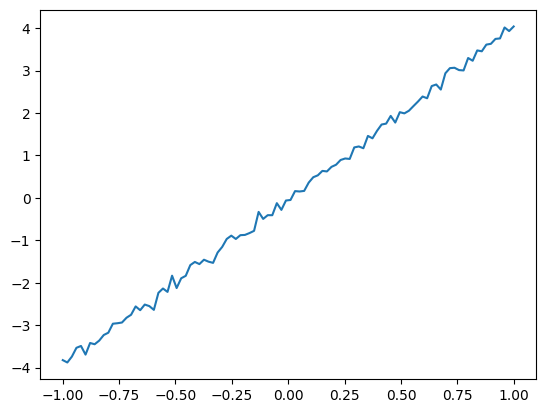

In [27]:
# fix random seed
np.random.seed(0)
torch.manual_seed(0)

# to fit the function y = w * w * x
w = 2
x = np.linspace(-1, 1, 100)
y = w * w * x
# add noise
y += np.random.normal(0, 0.1, 100)
# plot the data
import matplotlib.pyplot as plt
# plot inline
%matplotlib inline
plt.plot(x, y)


In [28]:
class TestNN(torch.nn.Module):
    def __init__(self, input_dim, layer_dims, activations, eps=1e-6):
        super(TestNN, self).__init__()
        self.linear = torch.nn.Linear(1, 1, bias=False)
        self.activation = torch.nn.ReLU()
    
    def forward(self, x):
        if isinstance(x, np.ndarray):
            x = torch.from_numpy(x).float()
        W = self.linear.weight
        x = W * W * x
        x = self.activation(x)
        return x
    

In [29]:

# create a neural network
nn = TestNN(1, [1], ['tanh'])
# create optimizer
optimizer = torch.optim.Adam(nn.parameters(), lr=0.01)
# create loss function



In [30]:
test_point = np.array([0.5])
nn(test_point)

tensor([[2.8026e-05]], grad_fn=<ReluBackward0>)

In [31]:
# train the neural network
for i in range(1000):
    # sample 10 state from the data
    idx = np.random.choice(100, 10)
    input = x[idx].copy()
    y_loss = y[idx].copy()

    # forward pass
    # create empty tensor to store the output
    output = torch.empty(10)
    # loop through the input
    for i in range(10):
        # get the output of the neural network
        output[i] = nn(input[i])
    
    # compute loss
    # convert y_loss to torch tensor
    y_loss = torch.from_numpy(y_loss).float()
    loss = torch.norm(output - y_loss, p=2)


    # zero gradients
    optimizer.zero_grad()
    # backward pass
    loss.backward()

    # print the gradient
    # print('gradient: ', nn.linear.weight.grad)
    # print('weight: ', nn.linear.weight)

    # update parameters
    optimizer.step()
    # print loss every 10 iterations
    if i % 10 == 0:
        print('loss: ', loss.item())

    

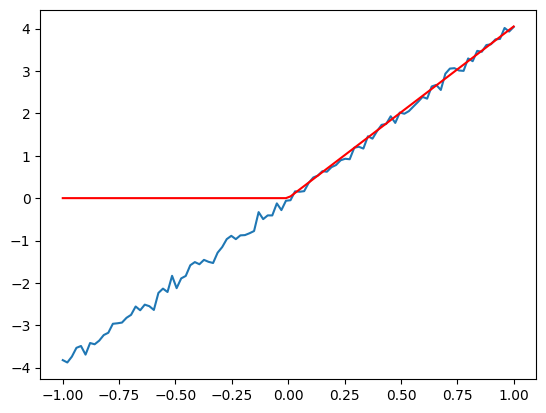

In [32]:
# plot the result
# plot the data
plt.plot(x, y)
# plot the neural network output
output = torch.empty(100)
for i in range(100):
    output[i] = nn(x[i])
plt.plot(x, output.detach().numpy(), 'r')

In [33]:
# fit a neural network to a 2d quadratic function
# fix random seed
np.random.seed(0)
torch.manual_seed(0)

P = np.array([1, 0.5, 0.5, 1]).reshape(2, 2)

# define an ellipse with center (0, 0) and radius 1
def ellipse(x):
    return x.T @ P @ x 




In [34]:
def get_points_on_ellipsoid(P, c, n_points=100, radius=1.0):
    # Determine the inverse of the square root of the matrix P
    P_sqrt_inv = np.linalg.inv(np.sqrt(P))
    # Create a circle in the 2d space
    theta = np.linspace(0, 2 * np.pi, n_points)
    circle = radius * np.vstack((np.cos(theta), np.sin(theta)))
    # Scale the circle with the inverse of the square root of P
    ellipse = P_sqrt_inv @ circle
    # Translate the ellipse to the center c
    ellipse = ellipse + c.reshape(-1, 1)
    return ellipse

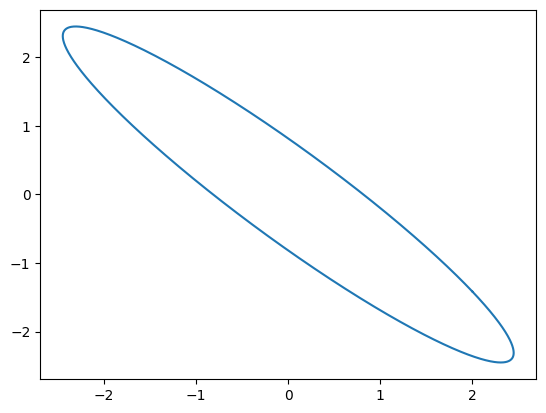

In [35]:

# get points on the ellipse
points = get_points_on_ellipsoid(P, np.zeros(2), n_points=1000, radius=1.0)
# plot the ellipse
plt.plot(points[0, :], points[1, :])


Complete Lyapunov nn implementation

In [36]:

class LyapunovNN(torch.nn.Module):
    # def __init__(self, dim_input, layer_dims, activations):
    def __init__(self, input_dim, layer_dims, activations, eps=1e-6):
        super(LyapunovNN, self).__init__()
        # network layers
        self.input_dim = input_dim
        self.num_layers = len(layer_dims)
        self.activations = activations
        self.eps = eps
        self.layers = torch.nn.ModuleList()
        self.kernel = []

        if layer_dims[0] < input_dim:
            raise ValueError('The first layer dimension must be at \
                             least the input dimension!')

        if np.all(np.diff(layer_dims) >= 0):
            self.output_dims = layer_dims
        else:
            raise ValueError('Each layer must maintain or increase \
                             the dimension of its input!')

        self.hidden_dims = np.zeros(self.num_layers, dtype=int)
        for i in range(self.num_layers):
            if i == 0:
                layer_input_dim = self.input_dim
            else:
                layer_input_dim = self.output_dims[i - 1]
            self.hidden_dims[i] = np.ceil((layer_input_dim + 1) / 2).astype(int)

        # build the nn structure
        for i in range(self.num_layers):
            if i == 0:
                layer_input_dim = self.input_dim
            else:
                layer_input_dim = self.output_dims[i - 1]
            self.layers.append(\
                        torch.nn.Linear(layer_input_dim, self.hidden_dims[i], bias=False))
            W = self.layers[-1].weight
            weight = W.clone()
            # weight = W
            kernel = torch.matmul(weight.T, W) + self.eps * torch.eye(W.shape[1])
            # kernel = torch.matmul(W.T, W) + self.eps * torch.eye(W.shape[1])
            dim_diff = self.output_dims[i] - layer_input_dim
            if dim_diff > 0:
                self.layers.append(torch.nn.Linear(layer_input_dim, dim_diff, bias=False))
                # print(kernel.shape, self.layers[-1].weight.shape)
                kernel = torch.cat((kernel, self.layers[-1].weight), dim=0)
            self.kernel.append(kernel)

    def forward(self, x):
        if isinstance(x, np.ndarray):
            x = torch.from_numpy(x).float()
        for i in range(self.num_layers):
            layer_output = torch.matmul(self.kernel[i], x)
            x = self.activations[i](layer_output)
        values = torch.sum(torch.square(x), dim=-1)
        return values
    
    def print_params(self):
        offset = 0
        # get nn parameters
        params = []
        for _, param in self.named_parameters():
            params.append(param.data)
        for i, dim_diff in enumerate(np.diff(np.concatenate([[self.input_dim], self.output_dims]))):
            print('Layer weights {}:'.format(i))
            W0 = params[offset + i]
            print('W0:\n{}'.format(W0))
            if dim_diff > 0:
                W1 = params[offset + 1 + i]
                print('W1:\n{}'.format(W1))
            else:
                offset += 1
            kernel = W0.T.dot(W0) + self.eps * np.eye(W0.shape[1])
            eigvals, _ = np.linalg.eig(kernel)
            print('Eigenvalues of (W0.T*W0 + eps*I):', eigvals, '\n')


Hard-coded Lyapunov NN 

In [62]:
class LyapunovNN_hardcoded(torch.nn.Module):
    # def __init__(self, dim_input, layer_dims, activations):
    def __init__(self, input_dim, layer_dims, activations, eps=1e-6):
        super(LyapunovNN_hardcoded, self).__init__()
        # network layers
        self.input_dim = input_dim
        self.num_layers = len(layer_dims)
        self.activations = activations
        self.eps = eps
        self.layers = torch.nn.ModuleList()
        self.kernel = []

        if layer_dims[0] < input_dim:
            raise ValueError('The first layer dimension must be at \
                             least the input dimension!')

        if np.all(np.diff(layer_dims) >= 0):
            self.output_dims = layer_dims
        else:
            raise ValueError('Each layer must maintain or increase \
                             the dimension of its input!')

        self.hidden_dims = np.zeros(self.num_layers, dtype=int)
        for i in range(self.num_layers):
            if i == 0:
                layer_input_dim = self.input_dim
            else:
                layer_input_dim = self.output_dims[i - 1]
            self.hidden_dims[i] = np.ceil((layer_input_dim + 1) / 2).astype(int)

        # build the nn structure (hardcoded)
        self.layers.append(torch.nn.Linear(2, 2, bias=False))
        self.layers.append(torch.nn.Linear(2, 2, bias=False))
        W0 = self.layers[0].weight
        W1 = self.layers[1].weight
        # print('W1.shape\n', W1.shape)
        # print('W2.shape\n', W2.shape)
        self.kernel = [torch.matmul(W0.T, W0) + self.eps * torch.eye(W0.shape[1]),
                       torch.matmul(W1.T, W1) + self.eps * torch.eye(W1.shape[1])]

    def forward(self, x):
        if isinstance(x, np.ndarray):
            x = torch.from_numpy(x).float()
        x = self.activations[0](torch.matmul(self.kernel[0], x))
        x = self.activations[1](torch.matmul(self.kernel[1], x))
        x = torch.sum(torch.square(x))
        return x

In [64]:

# create a neural network
# nn = LyapunovNN(2, [2, 2], [torch.nn.Tanh(), torch.nn.Tanh()])
nn = LyapunovNN_hardcoded(2, [2, 2], [torch.nn.Tanh(), torch.nn.Tanh()])
# print parameters
for name, param in nn.named_parameters():
    if param.requires_grad:
        print(name, param.data.shape)

# create optimizer
optimizer = torch.optim.Adam(nn.parameters(), lr=0.01)

print(nn.layers[0].weight)
print(nn.kernel[0])
eigvals, _ = np.linalg.eig(nn.kernel[0].detach().numpy())
print('Eigenvalues of (W0.T*W0 + eps*I):', eigvals, '\n')

print(nn.layers[1].weight)
print(nn.kernel[1])
eigvals, _ = np.linalg.eig(nn.kernel[1].detach().numpy())
print('Eigenvalues of (W1.T*W1 + eps*I):', eigvals, '\n')


layers.0.weight torch.Size([2, 2])
layers.1.weight torch.Size([2, 2])
Parameter containing:
tensor([[-0.6736, -0.0127],
        [-0.5325, -0.5454]], requires_grad=True)
tensor([[0.7373, 0.2990],
        [0.2990, 0.2977]], grad_fn=<AddBackward0>)
Eigenvalues of (W0.T*W0 + eps*I): [0.8885654 0.1463641] 

Parameter containing:
tensor([[-0.0390,  0.1062],
        [-0.2896,  0.4196]], requires_grad=True)
tensor([[ 0.0854, -0.1256],
        [-0.1256,  0.1873]], grad_fn=<AddBackward0>)
Eigenvalues of (W1.T*W1 + eps*I): [0.00076322 0.27193454] 



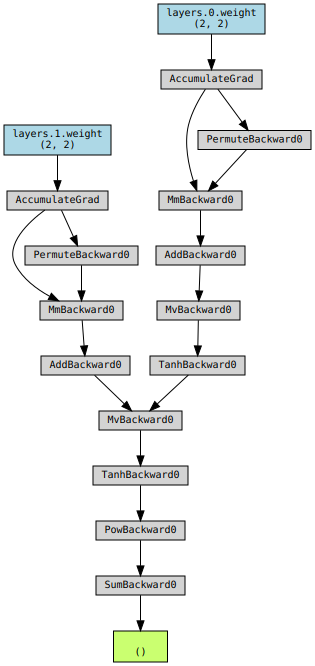

In [71]:
from torchviz import make_dot

# create dummy input
x = torch.tensor([1., 1.])
# forward pass
y = nn(x)
# make graph
make_dot(y, params=dict(list(nn.named_parameters())))

In [72]:
torch.autograd.set_detect_anomaly(True)

# train the neural network
for i in range(1000):
    # sample 10 state from the data
    idx = np.random.choice(100, 10)
    input = points[:, idx].copy()
    # forward pass
    # create empty tensor to store the output
    output = torch.empty(10)
    # loop through the input
    for i in range(10):
        # get the output of the neural network
        output[i] = nn(input[:, i])
    # compute loss
    loss = torch.mean(output)

    # zero gradients
    optimizer.zero_grad()
    # backward pass
    # loss.backward()
    loss.backward(retain_graph=True)

    # print the gradient
    # print('gradient: ', nn.layers.weight.grad)
    # print('weight: ', nn.linear.weight)

    # update parameters
    optimizer.step()
    # print loss every 10 iterations
    if i % 10 == 0:
        print('loss: ', loss.item())

/home/tumeilsy-mo-10/anaconda3/envs/safe/lib/python3.10/site-packages/torch/autograd/__init__.py:197: UserWarning: Error detected in MmBackward0. No forward pass information available. Enable detect anomaly during forward pass for more information. (Triggered internally at ../torch/csrc/autograd/python_anomaly_mode.cpp:92.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.